<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/13_%EC%9C%84%EC%8A%A4%EC%BD%98%EC%8B%A0_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00


# 데이터셋 로딩

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# dir(cancer)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = cancer.data
target = cancer.target

df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [ ]:
# 양성(1) 유방암, 음성(0) 정상 데이터셋의 개수 파악 - 불균형한 데이터셋인지를 파악하기 위해
np.unique(cancer.target, return_counts= True)

(array([0, 1]), array([212, 357]))

In [ ]:
# 30개의 feature 확인
for i, feature in enumerate(cancer.feature_names):
    print(f'feature{i+1}: {feature}')

feature1: mean radius
feature2: mean texture
feature3: mean perimeter
feature4: mean area
feature5: mean smoothness
feature6: mean compactness
feature7: mean concavity
feature8: mean concave points
feature9: mean symmetry
feature10: mean fractal dimension
feature11: radius error
feature12: texture error
feature13: perimeter error
feature14: area error
feature15: smoothness error
feature16: compactness error
feature17: concavity error
feature18: concave points error
feature19: symmetry error
feature20: fractal dimension error
feature21: worst radius
feature22: worst texture
feature23: worst perimeter
feature24: worst area
feature25: worst smoothness
feature26: worst compactness
feature27: worst concavity
feature28: worst concave points
feature29: worst symmetry
feature30: worst fractal dimension


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df.info()

# 데이터 전처리

## 훈련 데이터와 테스트 데이터 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    test_size= 0.2, random_state= 42)

## standarization(표준화)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(scaled_train, y_train)

LogisticRegression()

In [ ]:
# 훈련모델을 이용한 예측
lr.predict(scaled_train[:5])

array([1, 0, 1, 1, 1])

- 악성종양(malignant) = 음성클래스 - 0
- 양성종양(benign) = 양성클래스 - 1
- 분류에서 우리가 찾고자하는 값이 양성클래스이다.

In [ ]:
# 예측확률
lr.predict_proba(scaled_train[:5])

array([[1.27395194e-01, 8.72604806e-01],
       [9.99999998e-01, 2.12452704e-09],
       [4.55094715e-06, 9.99995449e-01],
       [4.08096234e-02, 9.59190377e-01],
       [2.56532183e-05, 9.99974347e-01]])

In [ ]:
# classes_: 분류한 클래스
lr.classes_

array([0, 1])

In [ ]:
# 계수(가중치 - 기울기와 절편)
lr.coef_, lr.intercept_

(array([[-0.42789615, -0.39391343, -0.38955025, -0.46431618, -0.06675416,
          0.54210625, -0.79677127, -1.1170207 ,  0.23571257,  0.07670117,
         -1.27114722,  0.18863977, -0.60936581, -0.90979979, -0.31246106,
          0.68597229,  0.18081531, -0.31769168,  0.49997976,  0.61340541,
         -0.87861043, -1.3421883 , -0.58755707, -0.84655924, -0.54994459,
          0.00520705, -0.94571375, -0.77343621, -1.20853126, -0.1541604 ]]),
 array([0.44359695]))

In [ ]:
# z값 출력
decisions = lr.decision_function(scaled_train[:5])
decisions

array([  1.92418875, -19.96971663,  12.30017063,   3.15717165,
        10.57081587])

In [ ]:
# 예측
pred = lr.predict(scaled_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

## 평가지표

- 회귀(regression): MAE, MSE, RMSE....
- 분류(classification): 정확도, 정밀도, 재현율(민감도), F1스코어, ROC커브곡선
- 군집화(clustering): DBI, 엘보우 메서드, 실루엣계수


In [ ]:
# 정확도(Accuracy): 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단
# 이진분류일 경우 불균형한 데이터셋일 경우 모델의 성능이 왜곡될 수 있다.
# 정확도 = 예측결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9736842105263158

# 혼돈 행렬(Confusion Matrix, 오차 행렬)

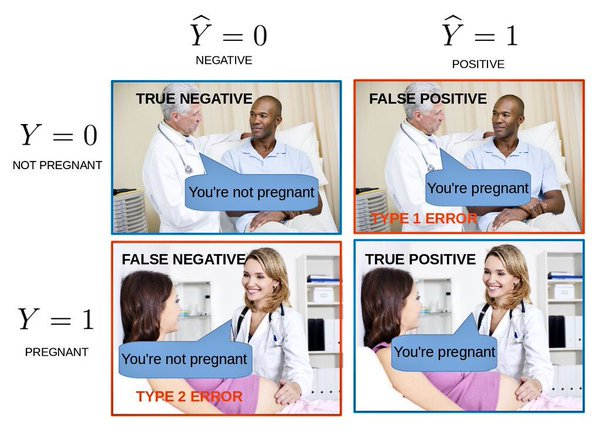

In [ ]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=500)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[41,  2],
       [ 1, 70]])

Text(50.722222222222214, 0.5, 'actual')

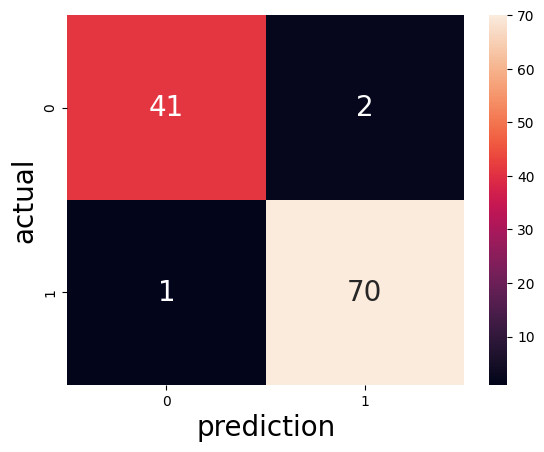

In [ ]:
# 혼돈 행렬 시각화
import seaborn as sns

sns.heatmap(cm, annot= True, annot_kws={'size': 20})
plt.xlabel('prediction', fontsize= 20)
plt.ylabel('actual', fontsize= 20)

In [ ]:
TN, FP, FN, TP = cm.ravel()

## 정밀도(Precision)

- Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

In [ ]:
from sklearn.metrics import precision_score
precision = TP / (FP + TP)
precision

0.9722222222222222

In [ ]:
precision_score(y_test, pred)

0.9722222222222222

## 재현율(Recall, 민감도)
- 실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- TPR(True Positive Ratio)

In [ ]:
recall = TP / (FN + TP)
recall

0.9859154929577465

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.9859154929577465

## F1 score
- 재현율과 정밀도의 조화를 나타내는 수치

In [ ]:
f1 = 2 * (precision * recall) /  (precision + recall)
f1

0.979020979020979

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.979020979020979

# XGBoostClassifier

In [ ]:
cancer = load_breast_cancer()

data = cancer.data
target = cancer.target

## 훈련 세트와 테스트 세트 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state= 42)


x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size= 0.1, random_state= 42)

In [ ]:
print(x_train.shape, x_test.shape)
print(x_tr.shape, x_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
import xgboost as xgb

In [ ]:
# 학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data= x_tr, label= y_tr)
dval = xgb.DMatrix(data=x_val, label= y_val)
dtest = xgb.DMatrix(data= x_test, label= y_test)

In [ ]:
params = {
    'max_Depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic', # 손실함수를 뭘 쓸거냐는 얘기
    'eval_metrics': 'logloss'
    }
num_rounds= 400

In [ ]:
# 학습 데이터셋은 'train, 평가 데이터셋은 'eval'
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(params= params, dtrain= dtr, num_boost_round= num_rounds, early_stopping_rounds= 50, evals= eval_list)

[0]	train-logloss:0.61949	eval-logloss:0.61033
[1]	train-logloss:0.58118	eval-logloss:0.57399
[2]	train-logloss:0.54643	eval-logloss:0.54162
[3]	train-logloss:0.51438	eval-logloss:0.51251
[4]	train-logloss:0.48506	eval-logloss:0.48659
[5]	train-logloss:0.45835	eval-logloss:0.46140
[6]	train-logloss:0.43349	eval-logloss:0.43751
[7]	train-logloss:0.41054	eval-logloss:0.41479
[8]	train-logloss:0.38916	eval-logloss:0.39564
[9]	train-logloss:0.36954	eval-logloss:0.37629
[10]	train-logloss:0.35103	eval-logloss:0.36048
[11]	train-logloss:0.33394	eval-logloss:0.34549
[12]	train-logloss:0.31780	eval-logloss:0.33074
[13]	train-logloss:0.30262	eval-logloss:0.31779
[14]	train-logloss:0.28852	eval-logloss:0.30478
[15]	train-logloss:0.27536	eval-logloss:0.29244
[16]	train-logloss:0.26288	eval-logloss:0.28061
[17]	train-logloss:0.25106	eval-logloss:0.27044
[18]	train-logloss:0.24006	eval-logloss:0.26124
[19]	train-logloss:0.22959	eval-logloss:0.25233
[20]	train-logloss:0.21938	eval-logloss:0.24410
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)
# 수행 결과값을 10개만 표시, 예측 확률 값으로 표시
np.round(pred_probs[:10], 3)

array([0.993, 0.001, 0.   , 1.   , 1.   , 0.001, 0.001, 0.107, 0.147,
       1.   ], dtype=float32)

In [ ]:
# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_probs]
preds[:10]

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]

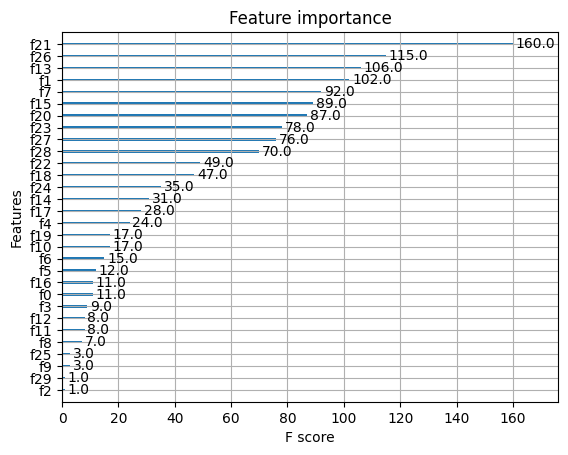

In [ ]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

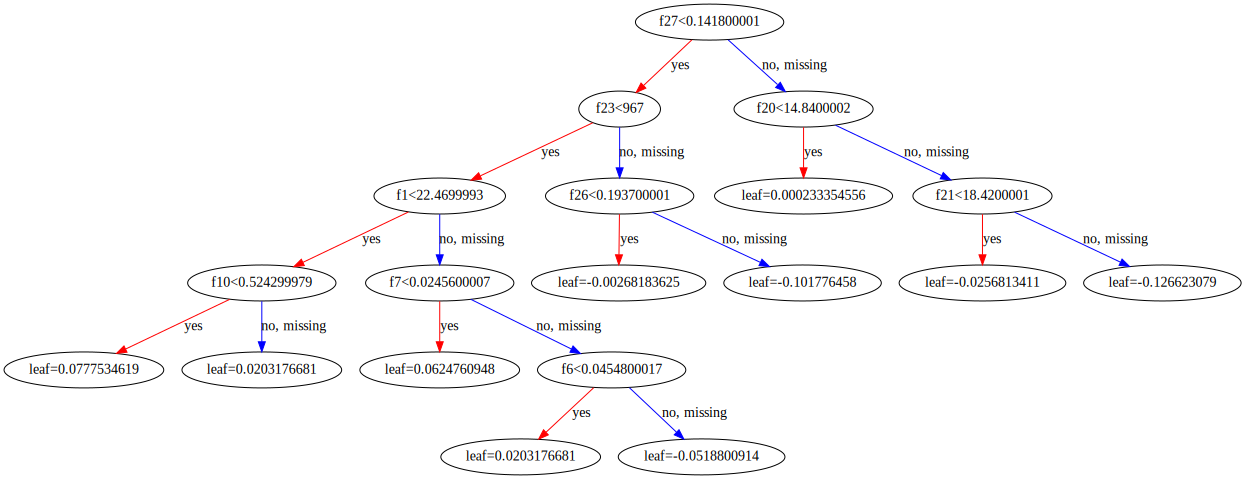

In [ ]:
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)

In [ ]:
xgb.cv(params= params, dtrain= dtr, num_boost_round= 10, nfold= 3, metrics= 'logloss')

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.618637,0.012861,0.629452,0.024697
1,0.581268,0.013159,0.595339,0.024906
2,0.547120,0.013130,0.564711,0.023978
3,0.516008,0.013030,0.537088,0.023594
4,0.487640,0.012988,0.511787,0.024964
5,0.461436,0.012781,0.488739,0.025155
6,0.436946,0.012922,0.467910,0.025976
7,0.414728,0.012896,0.448067,0.026442
8,0.393829,0.012584,0.429960,0.026788
9,0.374213,0.012450,0.413333,0.028062


In [ ]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(n_estimators= 400, learning_rate= 0.1, max_depth= 3)
xgb2.fit(x_train, y_train)

xgb2_pred = xgb2.predict(x_test)
xgb2_pred_proba = xgb2.predict_proba(x_test)[:, 1]

In [ ]:
# 래퍼클래스 wrapper, wrapping, int(), list(), interger()
# XGB 조기 중단
xgb_w = XGBClassifier(n_estimators= 400, learning_rate= 0.1, max_depth= 3)

# eval_set
evals = [(x_test, y_test)]

# 조기 중단 지정
# verbose= True, 상세한 정보 출력
xgb_w.fit(x_train, y_train, early_stopping_rounds= 100,
          eval_metric= 'logloss',
          eval_set= evals,
          verbose= True)

[0]	validation_0-logloss:0.58740
[1]	validation_0-logloss:0.52275
[2]	validation_0-logloss:0.47235
[3]	validation_0-logloss:0.42765
[4]	validation_0-logloss:0.38913
[5]	validation_0-logloss:0.35715
[6]	validation_0-logloss:0.33209
[7]	validation_0-logloss:0.30697
[8]	validation_0-logloss:0.28488
[9]	validation_0-logloss:0.26528
[10]	validation_0-logloss:0.24982
[11]	validation_0-logloss:0.23678
[12]	validation_0-logloss:0.22303
[13]	validation_0-logloss:0.21039
[14]	validation_0-logloss:0.20074
[15]	validation_0-logloss:0.19130
[16]	validation_0-logloss:0.17893
[17]	validation_0-logloss:0.17262
[18]	validation_0-logloss:0.16728
[19]	validation_0-logloss:0.15980
[20]	validation_0-logloss:0.15591
[21]	validation_0-logloss:0.15278
[22]	validation_0-logloss:0.14559
[23]	validation_0-logloss:0.14165
[24]	validation_0-logloss:0.13924
[25]	validation_0-logloss:0.13493
[26]	validation_0-logloss:0.13142
[27]	validation_0-logloss:0.13052
[28]	validation_0-logloss:0.12751
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**민감하게 조정해야 하는 파라미터**
- booster 모양: 회귀(regression)
- eval_metric(평가함수) / objectiv(목적함수)
- eta(학습률)
- L1/ L2

**과적합 방지를 위해 조정해야 하는 것**
- learning rate 낮추기 => n_estimators는 높여야한다.
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기